In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

result_file = pd.read_csv("loan.csv",low_memory=False)
result_file.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
# Removed unnecessary variables
result_clean = result_file.drop(columns=['grade','sub_grade','emp_title','emp_length','title','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','pub_rec','policy_code'])
result_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,home_ownership,annual_inc,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,RENT,24000.0,...,171.62,NaN,16-May,0.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,RENT,30000.0,...,119.66,NaN,13-Sep,0.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,RENT,12252.0,...,649.91,NaN,16-May,0.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,RENT,49200.0,...,357.48,NaN,16-Apr,0.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,RENT,80000.0,...,67.79,16-Jun,16-May,0.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0


In [3]:
result_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39717 non-null  int64  
 1   member_id                    39717 non-null  int64  
 2   loan_amnt                    39717 non-null  int64  
 3   funded_amnt                  39717 non-null  int64  
 4   funded_amnt_inv              39717 non-null  float64
 5   term                         39717 non-null  object 
 6   int_rate                     39717 non-null  object 
 7   installment                  39717 non-null  float64
 8   home_ownership               39717 non-null  object 
 9   annual_inc                   39717 non-null  float64
 10  verification_status          39717 non-null  object 
 11  issue_d                      39717 non-null  object 
 12  loan_status                  39717 non-null  object 
 13  pymnt_plan      

In [4]:
### Check whether is there any NaN values there is annual_inc column
result_clean['annual_inc'].isnull().sum()

0

In [5]:
### Check whether is there any NaN values there is loan_amnt column
result_clean['loan_amnt'].isnull().sum()

0

In [6]:
### Change the data type of 'loan_amnt' from int64 to float64
result_clean['loan_amnt'] = result_clean['loan_amnt'].astype('float64')

In [7]:
### Change the data type of 'funded_amnt' from int64 to float64
result_clean['funded_amnt'] = result_clean['funded_amnt'].astype('float64')

In [8]:
result_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39717 non-null  int64  
 1   member_id                    39717 non-null  int64  
 2   loan_amnt                    39717 non-null  float64
 3   funded_amnt                  39717 non-null  float64
 4   funded_amnt_inv              39717 non-null  float64
 5   term                         39717 non-null  object 
 6   int_rate                     39717 non-null  object 
 7   installment                  39717 non-null  float64
 8   home_ownership               39717 non-null  object 
 9   annual_inc                   39717 non-null  float64
 10  verification_status          39717 non-null  object 
 11  issue_d                      39717 non-null  object 
 12  loan_status                  39717 non-null  object 
 13  pymnt_plan      

In [9]:
### int_rate param should be replaced by same with removal of '%' from its string
result_clean['int_rate'] = result_clean['int_rate'].str.replace(r'%', '')

In [10]:
### Param 'term' should be cleaned with removal of months from its value
result_clean['term'] = result_clean['term'].str.replace(r' months', '')

In [11]:
result_clean['term']

0         36
1         60
2         36
3         36
4         60
        ... 
39712     36
39713     36
39714     36
39715     36
39716     36
Name: term, Length: 39717, dtype: object

In [12]:
### To check any outliers appears in the dataset
result_clean.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,0.0,0.0,0.0,39717.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,NaN,NaN,NaN,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,NaN,NaN,NaN,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,0.000000,218.680000,0.0,NaN,NaN,NaN,NaN,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,0.000000,546.140000,0.0,NaN,NaN,NaN,NaN,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,0.000000,3293.160000,0.0,NaN,NaN,NaN,NaN,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,180.200000,29623.350000,7002.190000,36115.200000,0.0,NaN,NaN,NaN,NaN,0.0


In [13]:
### Check Is there any Null/NaN values ini term column
result_clean['term'].isnull().any()

False

Text(0.5, 1.0, 'Loan_Amount Vs Total Amount Of Principal Recovered.')

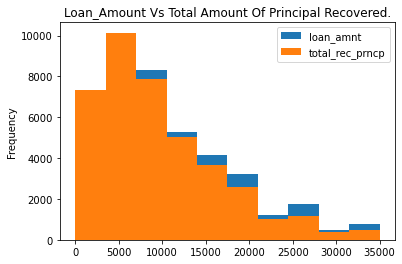

In [14]:
### Plot to visualize the Loan_amount Vs Total Recovered Principal Amount
### Borrowers who have not paid fully Payment against the loan funded amount they might be in the shadow region of Defaulters or being Charged-Off
result_clean[['loan_amnt','total_rec_prncp']].plot(kind = 'hist')
plt.title('Loan_Amount Vs Total Amount Of Principal Recovered.')

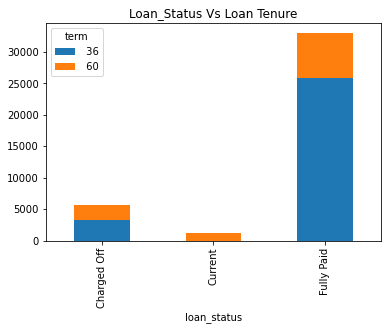

In [15]:
### If the tenure is 36 months, then it is high chance that loan will be fully paid rather than 60 months 
result_clean.groupby(['loan_status','term']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Loan_Status Vs Loan Tenure")
plt.show()

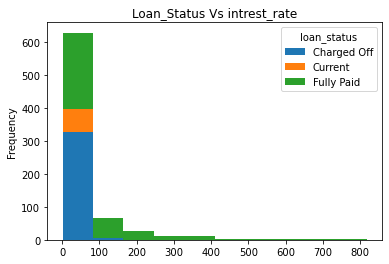

In [16]:
### If the intrest rate is more than 10% then it is high chance that loan borrower will be in shadow towards "Charged Off"
result_clean.groupby(['int_rate','loan_status']).size().unstack().plot(kind='hist',stacked=True)
plt.title("Loan_Status Vs intrest_rate")
plt.show()